# Chapter 4

# 4.5.5. Cluster-based methods for outlier detection

DBSCAN

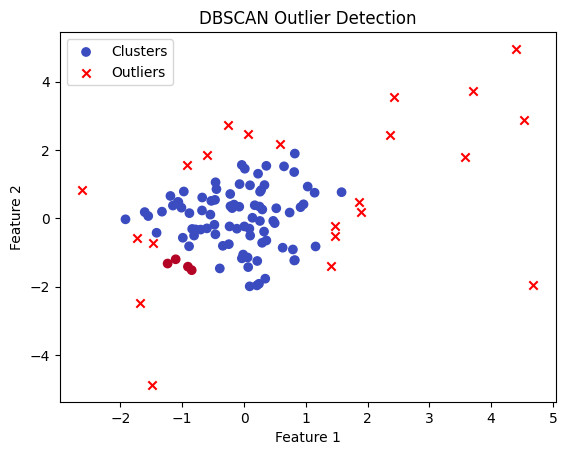

Detected Outliers:
 [[-1.72491783 -0.56228753]
 [ 1.46564877 -0.2257763 ]
 [-0.60170661  1.85227818]
 [-1.47852199 -0.71984421]
 [-2.6197451   0.8219025 ]
 [ 1.47789404 -0.51827022]
 [ 1.8861859   0.17457781]
 [ 0.06023021  2.46324211]
 [ 1.40279431 -1.40185106]
 [ 0.58685709  2.19045563]
 [-0.91942423  1.54993441]
 [ 1.86577451  0.47383292]
 [-0.26465683  2.72016917]
 [ 4.52847686  2.88922341]
 [ 2.36418889  2.42980901]
 [-1.68610619 -2.47689787]
 [ 3.71233387  3.72136074]
 [ 4.40486782  4.95888663]
 [ 3.57954215  1.79956717]
 [ 2.42360253  3.54951203]
 [ 4.6800641  -1.94405812]
 [-1.49300457 -4.87221672]]


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate sample data with outliers
np.random.seed(42)
# Generate 100 normal data points
X = np.random.normal(0, 1, (100, 2))

# Add some outliers
outliers = np.random.uniform(low=-6, high=6, size=(10, 2))
X = np.vstack([X, outliers])

# Fit DBSCAN model
# eps: maximum distance between two samples for them to be considered as in the same neighborhood
# min_samples: minimum number of samples in a neighborhood to form a cluster
db = DBSCAN(eps=0.5, min_samples=5).fit(X)

# Identify core points, border points, and noise points
labels = db.labels_

# Outliers are labeled as -1
outliers = X[labels == -1]
clusters = X[labels != -1]

# Plot the results
plt.scatter(clusters[:, 0], clusters[:, 1], c=labels[labels != -1], cmap='coolwarm', label='Clusters')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', label='Outliers')
plt.title('DBSCAN Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Print the detected outliers
print("Detected Outliers:\n", outliers)

K-Means Clustering

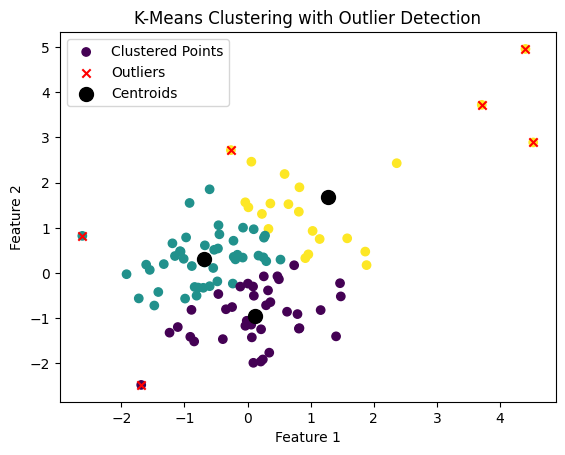

Detected Outliers:
 [[-2.6197451   0.8219025 ]
 [-0.26465683  2.72016917]
 [ 4.52847686  2.88922341]
 [-1.68610619 -2.47689787]
 [ 3.71233387  3.72136074]
 [ 4.40486782  4.95888663]]


In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate sample data with outliers
np.random.seed(42)
# Generate 100 normal data points
X = np.random.normal(0, 1, (100, 2))

# Add some outliers
outliers = np.random.uniform(low=-6, high=6, size=(5, 2))
X = np.vstack([X, outliers])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Calculate the distance of each point to its assigned cluster centroid
distances = np.linalg.norm(X - centroids[labels], axis=1)

# Identify outliers as points that are farthest from their cluster centroids
threshold = np.percentile(distances, 95)  # For example, we consider the top 5% farthest points as outliers
outliers = X[distances > threshold]

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='Clustered Points')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', label='Outliers')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='o', s=100, label='Centroids')
plt.title('K-Means Clustering with Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Print the detected outliers
print("Detected Outliers:\n", outliers)
